We consider the unidimensional function $h:\mathbb{R}\to\mathbb{R}$, which is continuous and decreasing at 0. That is, there exists $\eta > 0$ such that $h(x) < 0$ for each $0 < x \leq \eta$.  And we are looking for a local minimum of $h$ in the interval, using only the values of the function. 

We first need to identify three points $a$, $b$ and $c$ such that $a < b < c$, $h(a) > h(b)$ and $h(c) > h(b)$. To do that, we consider $\delta$ such that $h(\delta) < h(0)$ and apply the following algorithm. Note that such a $\delta$ exists as the function is decreasing in  

In [1]:
def initLineSearch(obj,delta):
    """ 
    """
    xkm1 = 0
    hxkm1 = obj(xkm1)
    xk = delta
    hxk = obj(xk)
    while hxk <= hxkm1:
        xkm2 = xkm1
        hxkm2 = hxkm1
        xkm1 = xk ; 
        hxkm1 = hxk ; 
        xk = 2.0 * xk ;
        hxk = obj(xk) ;
    return(xkm2,hxkm2,xkm1,hxkm1,xk,hxk) 

In [2]:
def quadraticInterpolation(obj,delta,eps):
    (a,ha,b,hb,c,hc) = initLineSearch(obj,delta)
    k = 1
    iters = list()
    s1 = max(ha,hc)-hb
    s2 = c-a
    while s1 > eps and s2 > eps:
        beta1 = ((b-c)*ha+(c-a)*hb+(a-b)*hc)/((a-b)*(c-a)*(c-b))
        beta2 = hb / (b-a)
        beta3 = ha / (a-b)
        xplus = (beta1 * (a+b) - beta2 - beta3) / (2 * beta1)
        if xplus == b:
            if (b-a) < (c-b):
                xplus =  b + eps / 2.0
            else:
                xplus =  b - eps / 2.0
        hxplus = obj(xplus)
        iters.append([a,b,c,xplus,ha,hb,hc,hxplus])
        if xplus > b:
            if hxplus > hb:
                c = xplus
                hc = hxplus
            else:
                a = b
                ha = hb
                b = xplus
                hb = hxplus
        else:
            if hxplus > hb:
                a = xplus
                ha = hxplus
            else:
                c = b
                hc = hb
                b = xplus
                hb = hxplus
        s1 = max(ha,hc)-hb
        s2 = c-a
        k = k + 1
    iters.append([a,b,c,xplus,ha,hb,hc,hxplus])
    return(b,iters) 

Consider the function \\[h(x)=(2+x) \cos(2+x).\\]

In order to identify a local minimum of $h$, we apply the quadratic interpolation algorithm with $\delta=6$ and $\varepsilon = 10^{-3}$.

(We use a high $\delta$ to get an example more illustrative).

In [3]:
import numpy as np
def h(x):
    return (2.0+x)*np.cos(2.0+x)

(xstar,iters) = quadraticInterpolation(h,6,1.0e-3)
print('The optimal solution is ',xstar,' and there are ',len(iters),' iterations.')


The optimal solution is  7.529334402960935  and there are  13  iterations.


We now plot each iteration. On each plot, the function $h$ corresponds to the blue line and the interpolant $q$ to the yellow dashed line.

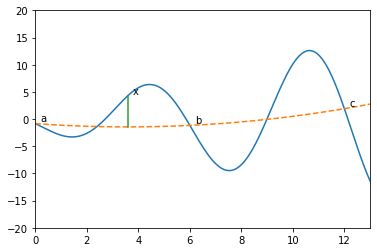

In [4]:
import matplotlib.pyplot as plt

def interpolant(iters,iteration):
    (a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
    (ap,bp,cp,xp,hap,hbp,hcp,hxp) = tuple(iters[iteration])
    b3 = ha / (a-b)
    b2 = hb / (b-a)
    b1num = (b-c) * ha + (c-a) * hb + (a-b) * hc
    b1denom = (a-b) * (c-a) * (c-b) 
    b1 = b1num / b1denom
    def q(x):
        return(b1 * (x-a) * (x-b) + b2 * (x-a) + b3 * (x-b))
    return q

iteration = 0
q = interpolant(iters,iteration)
(a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
xrange = np.arange(0.0,13.0,0.001)
plt.plot(xrange,h(xrange),'-',xrange,q(xrange),'--')
shift = 0.2
plt.annotate('a',xy=(a,ha),xytext=(a+shift,ha+2*shift))
plt.annotate('b',xy=(b,hb),xytext=(b+shift,hb+2*shift))
plt.annotate('c',xy=(c,hc),xytext=(c+shift,hc+2*shift))
plt.annotate('x',xy=(x,hx),xytext=(x+shift,hx+2*shift))
xopt,yopt = [x,x],[q(x),(h(x))]
plt.xlim(0, 13)
plt.ylim(-20, 20)
plt.plot(xopt,yopt)
plt.show()

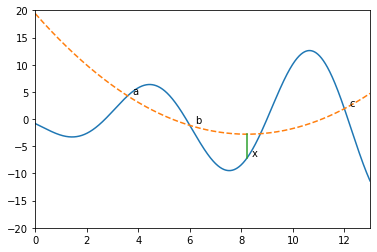

In [5]:
iteration = 1
q = interpolant(iters,iteration)
(a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
xrange = np.arange(0.0,13.0,0.001)
plt.plot(xrange,h(xrange),'-',xrange,q(xrange),'--')
shift = 0.2
plt.annotate('a',xy=(a,ha),xytext=(a+shift,ha+2*shift))
plt.annotate('b',xy=(b,hb),xytext=(b+shift,hb+2*shift))
plt.annotate('c',xy=(c,hc),xytext=(c+shift,hc+2*shift))
plt.annotate('x',xy=(x,hx),xytext=(x+shift,hx+2*shift))
xopt,yopt = [x,x],[q(x),(h(x))]
plt.xlim(0, 13)
plt.ylim(-20, 20)
plt.plot(xopt,yopt)
plt.show()

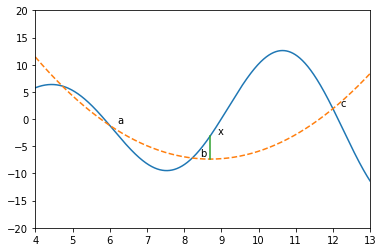

In [6]:
iteration = 2
q = interpolant(iters,iteration)
(a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
xrange = np.arange(0.0,13.0,0.001)
plt.plot(xrange,h(xrange),'-',xrange,q(xrange),'--')
shift = 0.2
plt.annotate('a',xy=(a,ha),xytext=(a+shift,ha+2*shift))
plt.annotate('b',xy=(b,hb),xytext=(b+shift,hb+2*shift))
plt.annotate('c',xy=(c,hc),xytext=(c+shift,hc+2*shift))
plt.annotate('x',xy=(x,hx),xytext=(x+shift,hx+2*shift))
xopt,yopt = [x,x],[q(x),(h(x))]
plt.xlim(4, 13)
plt.ylim(-20, 20)
plt.plot(xopt,yopt)
plt.show()

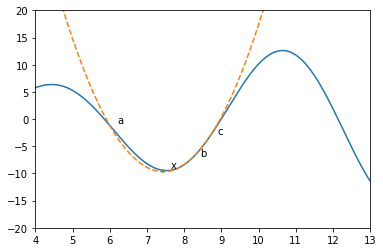

In [7]:
iteration = 3
q = interpolant(iters,iteration)
(a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
xrange = np.arange(0.0,13.0,0.001)
plt.plot(xrange,h(xrange),'-',xrange,q(xrange),'--')
shift = 0.2
plt.annotate('a',xy=(a,ha),xytext=(a+shift,ha+2*shift))
plt.annotate('b',xy=(b,hb),xytext=(b+shift,hb+2*shift))
plt.annotate('c',xy=(c,hc),xytext=(c+shift,hc+2*shift))
plt.annotate('x',xy=(x,hx),xytext=(x+shift,hx+2*shift))
xopt,yopt = [x,x],[q(x),(h(x))]
plt.xlim(4, 13)
plt.ylim(-20, 20)
plt.plot(xopt,yopt)
plt.show()